In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [82]:
#Relevant Material Properties 

cfrp_rho = 1550 #kg/m^3
cfrp_E = 135e9
cfrp_s = 2.5e9

helium_lifting_density = 1.292-0.178 #kg/m^3

# MILES

Digital materials lattices can be made to float by creating an ultra-ultralight lattice (density < 1 kg/m^3), and filling the empty space between the struts with a lifting gas like helium. 

Assuming pultruded carbon fiber tubes as the struts, injection molded PA66 nodes, 14 micron mylar film as the balloon material, and helium as the lifting gas.

For the geometry, we will use a cuboct lattice where the octahedra have spherical balloons. 

1. Plot per/voxel lift versus length for a range of lengths.
2. Find slenderness ratio for a cellular solids beam


## Designing a Heirarchical Airship Structure

1. Find the critical slenderness ratio $t/L$ for a given material
2. Find the required density of the strut to produce the desired lattice density at the given ratio.

### 1. What is the critical slenderness ratio for a cellular solids

When is tensile load equal to compressive load?

Compressive failure occurs loosely during Euler buckling. 

$$
0.7\pi^2 \frac{EI}{L^2}
$$

Tensile failure occurs when tensile load equals yield strength

$$
\sigma_Y A 
$$

For a square beam, 

$$
I = \frac{t^4}{12}
$$

and

$$
A = t^2
$$

so therefore

$$
\left(\frac{t}{L}\right)^2 = \frac{12}{0.7\pi^2}\frac{\sigma_Y}{E}
$$

for a cellular solid

$$E^* = \frac{\rho^*}{\rho}E$$
and
$$\sigma_Y^* = \frac{\rho^*}{\rho}\sigma_Y$$

and so as a result,

$$
\left(\frac{t}{L}\right)^2 = \frac{12}{0.7\pi^2}\frac{\sigma_Y^*}{E^*}
$$

(its the same)

#### For Carbon Fiber its...

In [277]:
slend_ratio = 12.0/(0.7*pi*pi)*cfrp_s/cfrp_E
print("(t/l)^2 = {0:3.4}".format(slend_ratio))

print("(t/l) = {0:3.4}".format(sqrt(slend_ratio)))

(t/l)^2 = 0.03217
(t/l) = 0.1793


### 2. 

What is the minimum relative density from the slenderness ratio? For cuboct.

$$
\frac{12}{2\sqrt{2}}\left(\frac{t}{L}\right)^2 = \frac{\rho^*}{\rho}
$$

and so for Carbon Fiber it is...

In [278]:
print("Minimum Relative Density: {0:3.4}".format(12.0/(2*sqrt(2))*0.03217))

Minimum Relative Density: 0.1365


### Lattice of Lattices
A lattice composed of cellular solids lattices has density $\rho^{**}$

$$
\frac{\rho^{**}}{\rho^*} = \frac{12}{2\sqrt{2}}\left(\frac{t_s}{L_s}\right)^2
$$

which is equal to

$$
\frac{\rho^{**}}{\rho} = \left(\frac{12}{2\sqrt{2}}\left(\frac{t_s}{L_s}\right)^2\right)^2
$$

If the lattices are composed of two different relative densities

$$
\frac{\rho^{**}}{\rho} = \left(\frac{12}{2\sqrt{2}}\frac{t_s}{L_s}\frac{t}{L}\right)^2
$$


In [292]:
print (0.25/1420*2*sqrt(2)/12.0)**0.25

sqrt(0.25/1420)*2*sqrt(2)/12.0/sqrt(0.0025/0.0762**3/1420*2*sqrt(2)/12.0)

0.0802608681352


0.10212082877809089

### Example

Using the Yosemite voxels, which have a $t/l$ of 0.0799 

If we want to reach a lattice with 0.25 kg/m^3, then how long do the struts in the cuboct of cubocts need to be? $t_s/l_s$ is 0.103. 



In [307]:
num_vox = 22 #voxels
pitch = 0.0762 #m/voxel
vox_mass = 0.0025 #kg/voxel

supervox_mass = (2*2*num_vox*vox_mass)*12+(4*pi*(num_vox*pitch/sqrt(2))**2)*areal_mass
lifting_force = 4.0/3.0*pi*(num_vox*pitch/sqrt(2))**3*lifting_density

print supervox_mass
print lifting_force

ussladisp = 78280.8 #m^3

(lifting_force-supervox_mass)*ussladisp/(num_vox*pitch*sqrt(2))**3

2.99315484463
7.77251847698


28076.785229819317

In [305]:
outd = 5.0
ind = 5.0*0.9
areal_mass = 0.02 #kg/m^2
#(6/sqrt(2)*rho*A*L+1.0/sqrt(2)*pi*(L)**2*areal_mass)/L**3 = den
#(6/sqrt(2)*rho*A+1.0/sqrt(2)*pi*L*areal_mass)-den*L**2 = 0
lat_rho = 0.25 #kg/m^3

print np.roots([-lat_rho,1.0/sqrt(2.0)*pi*areal_mass,6.0/sqrt(2)*cfrp_rho*A])
L = sqrt(6.0/sqrt(2)*cfrp_rho*A/lat_rho)
L

25*sqrt(2)

[ 3.22272322 -3.04500791]


35.355339059327378

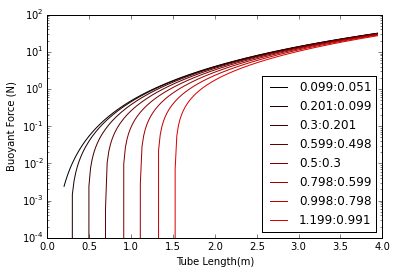

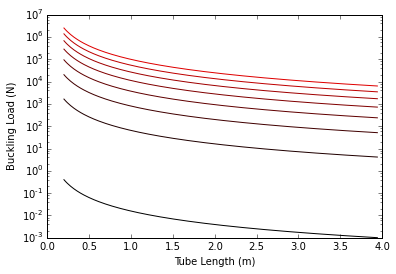

In [234]:
# Testing Cuboct density

colors = [(x/8.0,0.0,0.0) for x in range(8) ]

#RockWest Composites current inventory of pultruded rods
RW_pult_OD = [0.099,0.201,0.3,0.599,0.5,0.798,0.998,1.199]
RW_pult_ID = [0.051,0.099,0.201,0.498,0.3,0.599,0.798,0.991]

pult_od = arange(0.1,5.1,4.9/7.0)
pult_id = [x*0.9 for x in pult_od]

lengths = arange(0.1,2.0,0.01)
lengths[:] = [x*198.12/100.0 for x in lengths]

buoyantforces = []
buckling_loads = []

for i in range(len(pult_od)):
    tube_od = pult_od[i]/100.0
    tube_id = pult_id[i]/100.0
    
    buoyantforces.append([])
    buckling_loads.append([])
    for tube_length in lengths:
        A = ((tube_od/2.0)**2-(tube_id/2.0)**2)*pi
        I = pi/4.0*((tube_od/2.0)**4-(tube_id/2.0)**4)
        buckling_load = 0.7*pi*pi*cfrp_E*I/tube_length**2
        tensile_load = A*cfrp_s/9.8

        lifting_mass = (tube_length*sqrt(2.0))**3*lifting_density
        oct_mass = cfrp_rho*A*tube_length*12+12*tube_length**2*0.02

        buoyantforces[-1].append((lifting_mass-oct_mass)/6)
        buckling_loads[-1].append(buckling_load)
        
    plot(lengths,buoyantforces[-1],label="{0}:{1}".format(RW_pult_OD[i],RW_pult_ID[i]),c=colors[i])

legend(loc=4)
yscale('log')
ylabel("Buoyant Force (N)")
xlabel("Tube Length(m)")
show()
yscale('log')
for i,buckling_load_list in enumerate(buckling_loads):
    plot(lengths,buckling_load_list,c=colors[i])
xlabel("Tube Length (m)")
ylabel("Buckling Load (N)")


4.3498391307715538

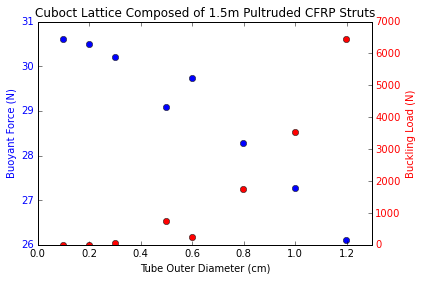

In [236]:
bf_arr = np.array(buoyantforces)
buck_arr = np.array(buckling_loads)
dex = 0
for i,length in enumerate(lengths):
    if length > 3.9 and dex ==0:
        dex = i
xlabel("Tube Outer Diameter (cm)")
ylabel("Buoyant Force (N)",color='b')
for tl in gca().get_yticklabels():
    tl.set_color('b')
plot(RW_pult_OD,bf_arr.T[dex],"bo")
twinx()
ylabel("Buckling Load (N)",color='r')
plot(RW_pult_OD,buck_arr.T[dex],"ro")
for tl in gca().get_yticklabels():
    tl.set_color('r')
#ylim([-10,250])
xlim([0,1.3])

title("Cuboct Lattice Composed of 1.5m Pultruded CFRP Struts")

bf_arr.T[dex][-1]/6

In [201]:
for rod_od in arange(0.1,10,0.1):
    rod_od = rod_od/100.0 #m
    for thickness in arange(0.01,0.1,0.001):
        rod_id = rod_od - thickness/100.0
        if rod_id < 0:
            rod_id = 0
        for rod_length in [0.25,0.5,1,2]:
            A = ((rod_od/2.0)**2-(rod_id/2.0)**2)*pi
            I = pi/4.0*((rod_od/2.0)**4-(rod_id/2.0)**4)
            
            buckling_load = 0.7*pi*pi*cfrp_E*I/rod_length**2/9.8
            tensile_load = A*cfrp_s/9.8

            lifting_mass = rod_length**3/(6*sqrt(2))*lifting_density
            tet_mass = cfrp_rho*A*rod_length*6

            if(buckling_load-tensile_load >0 and lifting_mass-tet_mass >0):
                print(rod_od*1000, rod_id*1000, rod_length)
                
print("None")

None


In [81]:
side_length = 1.0
tet_length = side_length/sqrt(2)

tet_vol = tet_length**3/(6*sqrt(2))*8
oct_vol = sqrt(2)/3.0*tet_length**3
side_length**3/oct_vol

6.0

In [185]:
2/(3*25.4/1000)

26.24671916010499

In [197]:
4*26*0.0025
print tube_od
A = ((tube_od/2.0)**2-(tube_id/2.0)**2)*pi
cfrp_rho*A*2*12

0.01199


1.3308842055737973

In [191]:
4*26*0.0025

0.26